<a href="https://colab.research.google.com/github/riddhi7/eggNOG/blob/main/Graphs_and_Confidence_Intervals(Euk).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import math
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import t
from scipy.optimize import curve_fit

In [8]:
file_path = "/content/drive/MyDrive/All final data files (x and y axis)/EUKARYOTES (x and y axis).xlsx"
df = pd.read_excel(file_path)

In [9]:
df = df.fillna(0)
df

,Total_proteins,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,S,T,U,V,W,Y,Z,ORG_ID
0,4725,252,78,190,137,233,78,186,115,150,334,324,178,41,1.0,373,132,89,1036,251,395,21,4,30,97,1005962
1,4851,252,79,195,143,237,80,198,123,152,337,329,191,39,2.0,369,138,103,1084,254,390,23,5,30,98,1041607
2,4489,272,73,165,135,162,72,152,104,126,339,365,206,35,2.0,354,104,54,953,232,428,17,5,31,103,1071379
3,4849,293,75,186,138,183,75,159,108,130,358,387,213,35,3.0,373,109,63,1110,240,443,17,5,32,114,113608
4,8368,274,89,237,134,288,89,289,154,186,370,222,212,71,3.0,593,211,149,4000,310,323,35,7,20,102,159749
5,4389,263,72,176,107,187,65,173,148,135,370,201,181,47,1.0,418,115,85,1088,217,231,19,3,27,60,242159
6,5080,276,89,201,121,240,76,227,155,156,355,223,189,52,2.0,490,141,126,1289,273,267,25,2,27,78,248742
7,4884,301,76,183,142,189,79,156,109,127,354,394,211,35,2.0,373,114,62,1117,237,458,16,5,32,112,27288
8,4863,299,77,177,139,189,79,156,108,130,355,394,214,35,2.0,371,116,63,1101,240,453,17,5,32,111,27289
9,5111,249,82,201,138,220,72,180,107,167,339,341,184,41,1.0,365,125,96,1398,253,400,22,6,30,94,273371


In [20]:
x = df['Total_proteins']
y = df['J']

In [21]:
y = y[y != 0] # Remove zero values
x = x[y.index] # Select corresponding x values
logx, logy = np.log(x), np.log(y)

b, loga = np.polyfit(logx, logy, 1)
a = np.exp(loga)

In [34]:
def power_law(x, a, b):
  return a * np.power(x, b)

In [23]:
# Plotting parameters

plt.style.use('seaborn')
sns.set_style('white')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


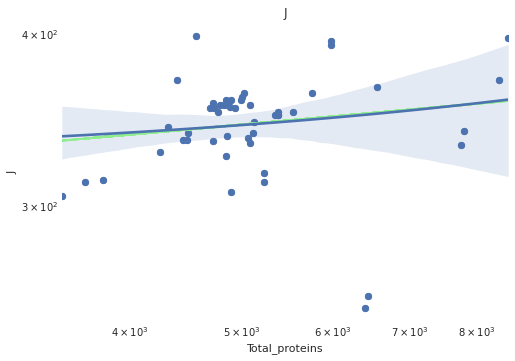

In [35]:
pars, cov = curve_fit(f=power_law, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))
stdevs = np.sqrt(np.diag(cov))
res_plaw = y - power_law(x, *pars) # Residual for power law fit

plt.xscale('log')
plt.yscale('log')

plt.plot(x, power_law(x, *pars), linestyle='-', linewidth=2, color='lightgreen')
plt.scatter(x, y)
plt.title('J')

ax = sns.regplot(x, y, ci=95, color=None)
slope_intercept = np.polyfit(x, y, 1)
res_linear = stats.linregress(x, y) # Residual for linear fit

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x) - 2)

plt.savefig('J_euk.png', dpi=200)

In [29]:
std_err = res.stderr
print(f"Slope (95%): {b:.6f} +/- {ts * std_err:.6f}")

Slope (95%): 0.063717 +/- 0.007607


### Extra Section


Using statsmodels v0.12.2 since numerical fitting values could not be obtained using Seaborn alone. 
https://www.statsmodels.org/stable/regression.html

In [32]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fitting model
mod = sm.OLS(y, x)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      J   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              1179.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                    6.15e-36
Time:                        17:59:57   Log-Likelihood:                         -282.65
No. Observations:                  50   AIC:                                      567.3
Df Residuals:                      49   BIC:                                      569.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------